In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('training_variants.csv')
y = df['Class']
df

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4
...,...,...,...,...
3316,3316,RUNX1,D171N,4
3317,3317,RUNX1,A122*,1
3318,3318,RUNX1,Fusions,1
3319,3319,RUNX1,R80C,4


In [2]:
df['Gene']

0       FAM58A
1          CBL
2          CBL
3          CBL
4          CBL
         ...  
3316     RUNX1
3317     RUNX1
3318     RUNX1
3319     RUNX1
3320     RUNX1
Name: Gene, Length: 3321, dtype: object

In [3]:
df['Variation'].value_counts()

Truncating Mutations    93
Deletion                74
Amplification           71
Fusions                 34
Overexpression           6
                        ..
H1094R                   1
M1250T                   1
PTPRZ1-MET Fusion        1
H1106D                   1
K83E                     1
Name: Variation, Length: 2996, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

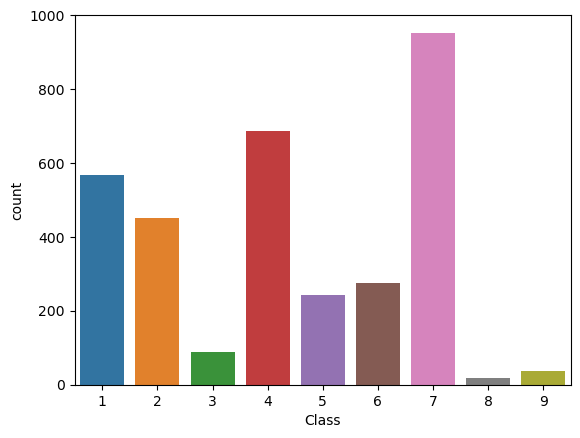

In [4]:

sns.countplot(x=df.Class) 

<AxesSubplot:xlabel='Variation', ylabel='count'>

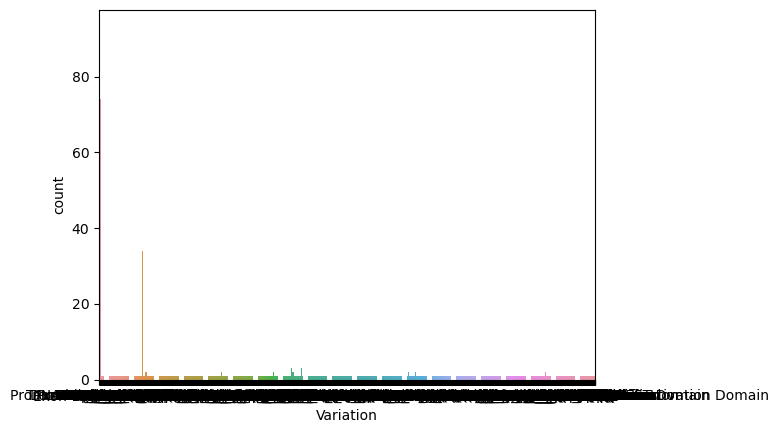

In [5]:
import seaborn as sns
sns.countplot(x='Variation',data=df)

In [6]:
y=df['Class']
X = df.drop(['Class','ID'], axis=1 )
X


,Gene,Variation
0,FAM58A,Truncating Mutations
1,CBL,W802*
2,CBL,Q249E
3,CBL,N454D
4,CBL,L399V
...,...,...
3316,RUNX1,D171N
3317,RUNX1,A122*
3318,RUNX1,Fusions
3319,RUNX1,R80C


In [7]:
y = df['Class']

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gene       3321 non-null   object
 1   Variation  3321 non-null   object
dtypes: object(2)
memory usage: 52.0+ KB


In [9]:
df.isnull().sum()

ID           0
Gene         0
Variation    0
Class        0
dtype: int64

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X['Gene']= le.fit_transform(X['Gene'])
X['Variation']= le.fit_transform(X['Variation'])
X

,Gene,Variation
0,85,2629
1,39,2856
2,39,1897
3,39,1667
4,39,1447
...,...,...
3316,221,306
3317,221,28
3318,221,807
3319,221,2249


In [11]:
from time import time
start=time()

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2656, 2), (665, 2), (2656,), (665,))

In [14]:
from sklearn.preprocessing import StandardScaler
# List of models to try
models = [KNeighborsClassifier(),
          GaussianNB(),
          LogisticRegression(),
          RandomForestClassifier(),
          DecisionTreeClassifier(),
          GradientBoostingClassifier(),
         ]

# Hyperparameters to try
param_grid = {'KNeighborsClassifier': {'n_neighbors': [10,12,14,16,18,20,22,24,26,28,30]},
              'GaussianNB': {'var_smoothing': [.00001,.0001,.001,0.01,0.1,1,10]},
              'LogisticRegression':{'C': [.00001,.0001,.001,0.01,0.1,1,10]},
              'RandomForestClassifier': {'n_estimators': [100, 200], 'max_depth': [80,90],'max_features': [2, 3]},
              'DecisionTreeClassifier': {'max_depth': [3, 5, 70,85]},
              'GradientBoostingClassifier': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.5, 1]}
             }


# Dataframe to store results
metrics = {'Model': [], 'ATR': [], 'ATS': [], 'F1_TR': [], 'F1_TS': [], 'B_P': []}

# Looping through models
for i, model in enumerate(models):
    # Get model name
    model_name = str(model).replace("()","")
    # model_names.append(model_name)
    # Perform grid search with cross-validation
    gs = GridSearchCV(estimator=model, param_grid=param_grid[model_name], cv=5, n_jobs =-1)
    gs.fit(X_train, y_train)
    
    # Get best parameters
    best_params = gs.best_params_
    print(f"Best Paramenters for {model_name} is {best_params}")

    # Fit model with best parameters
    model.set_params(**best_params)
    model.fit(X_train, y_train)
    # Append in a list for future use
    # basic_models.append(model)
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate metrics
    accuracy_train = accuracy_score(y_pred_train,y_train)
    accuracy_test = accuracy_score(y_pred_test,y_test)
    f1_train=f1_score(y_pred_train,y_train,average= 'micro')
    f1_test = f1_score(y_pred_test,y_test,average= 'micro')
    
    # Append to DataFrame
    metrics['Model'].append(model_name)    
    metrics['ATR'].append(f"{accuracy_train:.3f}")
    metrics['ATS'].append(f"{accuracy_test:.3f}")
    metrics['F1_TR'].append(f"{f1_train:.3f}")
    metrics['F1_TS'].append(f"{f1_test:.3f}")
    metrics['B_P'].append(best_params)
    
    
    metrics_df = pd.DataFrame(metrics)
    

    print(f"{model.__class__.__name__}: accuracy_train={accuracy_train:.4f} accuracy_test={accuracy_test:.4f} f1_train={f1_train:.4f}, f1_test = {f1_test:.4f}")
    print()

Best Paramenters for KNeighborsClassifier is {'n_neighbors': 10}
KNeighborsClassifier: accuracy_train=0.5139 accuracy_test=0.3880 f1_train=0.5139, f1_test = 0.3880

Best Paramenters for GaussianNB is {'var_smoothing': 0.001}
GaussianNB: accuracy_train=0.3543 accuracy_test=0.3759 f1_train=0.3543, f1_test = 0.3759

Best Paramenters for LogisticRegression is {'C': 0.1}
LogisticRegression: accuracy_train=0.2828 accuracy_test=0.2677 f1_train=0.2828, f1_test = 0.2677

Best Paramenters for RandomForestClassifier is {'max_depth': 80, 'max_features': 2, 'n_estimators': 200}
RandomForestClassifier: accuracy_train=1.0000 accuracy_test=0.5489 f1_train=1.0000, f1_test = 0.5489

Best Paramenters for DecisionTreeClassifier is {'max_depth': 70}
DecisionTreeClassifier: accuracy_train=1.0000 accuracy_test=0.5188 f1_train=1.0000, f1_test = 0.5188

Best Paramenters for GradientBoostingClassifier is {'learning_rate': 0.1, 'n_estimators': 200}
GradientBoostingClassifier: accuracy_train=0.8012 accuracy_test=

In [16]:
table = PrettyTable()
table.add_column("Model Name", metrics['Model'])
table.add_column("Accu_train",metrics['ATR'])
table.add_column("Accu_test",metrics['ATS'])
table.add_column("F1_train",metrics['F1_TR'])
table.add_column("F1_test",metrics['F1_TS'])
table.add_column("Best parameters",metrics['B_P'])
print(table)

+----------------------------+------------+-----------+----------+---------+-----------------------------------------------------------+
|         Model Name         | Accu_train | Accu_test | F1_train | F1_test |                      Best parameters                      |
+----------------------------+------------+-----------+----------+---------+-----------------------------------------------------------+
|    KNeighborsClassifier    |   0.514    |   0.388   |  0.514   |  0.388  |                    {'n_neighbors': 10}                    |
|         GaussianNB         |   0.354    |   0.376   |  0.354   |  0.376  |                  {'var_smoothing': 0.001}                 |
|     LogisticRegression     |   0.283    |   0.268   |  0.283   |  0.268  |                         {'C': 0.1}                        |
|   RandomForestClassifier   |   1.000    |   0.549   |  1.000   |  0.549  | {'max_depth': 80, 'max_features': 2, 'n_estimators': 200} |
|   DecisionTreeClassifier   |   1.000   

In [22]:
best=metrics_df.sort_values(by = ['ATR','F1_TR'], ascending=False).set_index('Model')
print(best)
print()
print(f"Best Model is : \033[1m{best.index[0]}\033[0m with the best parameters : \033[1m{best.iloc[0,-1]}\033[0m")

                              ATR    ATS  F1_TR  F1_TS  \
Model                                                    
RandomForestClassifier      1.000  0.549  1.000  0.549   
DecisionTreeClassifier      1.000  0.519  1.000  0.519   
GradientBoostingClassifier  0.801  0.561  0.801  0.561   
KNeighborsClassifier        0.514  0.388  0.514  0.388   
GaussianNB                  0.354  0.376  0.354  0.376   
LogisticRegression          0.283  0.268  0.283  0.268   

                                                                          B_P  
Model                                                                          
RandomForestClassifier      {'max_depth': 80, 'max_features': 2, 'n_estima...  
DecisionTreeClassifier                                      {'max_depth': 70}  
GradientBoostingClassifier        {'learning_rate': 0.1, 'n_estimators': 200}  
KNeighborsClassifier                                      {'n_neighbors': 10}  
GaussianNB                                           {'

<AxesSubplot:>

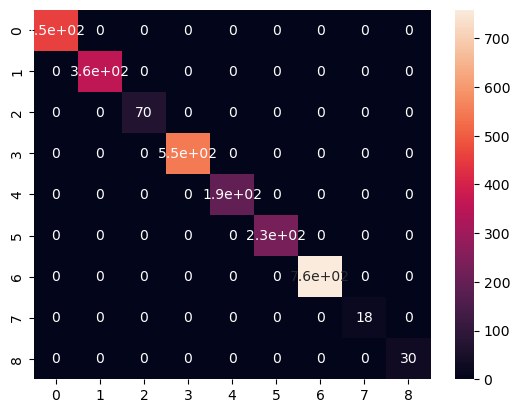

In [24]:
c= confusion_matrix(y_pred_train, y_train)
sns.heatmap(c, annot=True)

<AxesSubplot:>

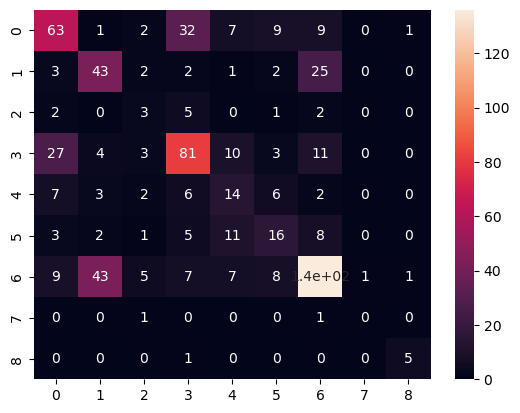

In [25]:
c= confusion_matrix(y_pred_test, y_test)
sns.heatmap(c, annot=True)

In [26]:
end=time()
total_time=end-start
minute=int(total_time/60)
second=total_time%60
print('Total execution time is : {}'.format(total_time))
print(f"Which translates to: {minute} minutes and {second:.3f} seconds.")

Total execution time is : 389.53579211235046
Which translates to: 6 minutes and 29.536 seconds.
